In [41]:
import pickle
import pandas as pd
import sklearn.tree as tree
import sklearn.ensemble as ensemble
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Ref:
https://scikit-learn.org/stable/supervised_learning.html

use more Ensemble learning algos

In [2]:
data = pickle.load(open("Data/TRAININGDATA.SALAMP.xlsx K3-Part0.p", "rb"))
data2 = pickle.load(open("Data/TRAININGDATA.SALAMP.xlsx K3-Part1.p", "rb"))
# data2["Antibiotic"] = "Test"
df = data.append(data2)

# Change columns names of MIC in case there are similar column names
df.columns = [v for v in df.columns[:1]] + ["MIC_val"] + [v for v in df.columns[2:]]

In [3]:
df

,Antibiotic,MIC_val,EVW,MIP,PPT,AFG,KPH,CTN,CTK,PQX,...,HGN,FCA,RDW,TLY,AWR,VCE,LLH,GST,PVN,RAA
0,AMP,0.0,71.0,114.0,112.0,506.0,52.0,21.0,23.0,0.0,...,97.0,74.0,79.0,278.0,190.0,74.0,345.0,639.0,210.0,892.0
1,AMP,0.0,70.0,107.0,117.0,500.0,56.0,25.0,18.0,0.0,...,96.0,73.0,78.0,281.0,189.0,71.0,329.0,672.0,214.0,893.0
2,AMP,0.0,72.0,114.0,113.0,512.0,51.0,21.0,23.0,0.0,...,97.0,74.0,79.0,278.0,191.0,74.0,345.0,643.0,211.0,905.0
3,AMP,0.0,69.0,107.0,122.0,474.0,59.0,20.0,18.0,0.0,...,93.0,74.0,79.0,302.0,179.0,64.0,333.0,642.0,216.0,882.0
4,AMP,0.0,78.0,107.0,109.0,463.0,53.0,23.0,17.0,0.0,...,96.0,74.0,75.0,289.0,182.0,67.0,334.0,681.0,212.0,854.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,AMP,6.0,76.0,111.0,106.0,505.0,62.0,23.0,20.0,0.0,...,100.0,77.0,81.0,306.0,200.0,72.0,338.0,726.0,219.0,936.0
2634,AMP,6.0,71.0,107.0,111.0,509.0,65.0,22.0,18.0,0.0,...,99.0,77.0,80.0,304.0,195.0,67.0,328.0,723.0,228.0,891.0
2635,AMP,0.0,68.0,111.0,113.0,488.0,52.0,24.0,17.0,0.0,...,98.0,75.0,84.0,307.0,189.0,66.0,326.0,608.0,209.0,850.0
2636,AMP,6.0,71.0,104.0,115.0,489.0,54.0,25.0,20.0,0.0,...,104.0,76.0,85.0,284.0,189.0,72.0,356.0,666.0,217.0,877.0


In [4]:
# Create 1 hot encoding columns and append to the end
dummies = pd.get_dummies(df.Antibiotic)
df = pd.concat([df, dummies], axis=1)

In [5]:
# Get input and ouput columns
X = df.drop(columns=["Antibiotic", "MIC_val"], axis=1)
y = df.iloc[:,1]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_up = pd.DataFrame([str(float(x) + 1) for x in y_test]).iloc[:, 0]
y_test_down = pd.DataFrame([str(float(x) - 1) for x in y_test]).iloc[:, 0]

In [91]:
# Number of 0.0, 1.0, ... in y
for i in range(7):
    print(sum([v == f'{i:.1f}' for v in y]))

3122
527
30
3
2
3
1590


# Naive Bayes

Accuracy: 0.38257575757575757
Accuracy (2 dilutions): 0.4573863636363636


Text(0.5, 1.0, 'Confusion Matrix')

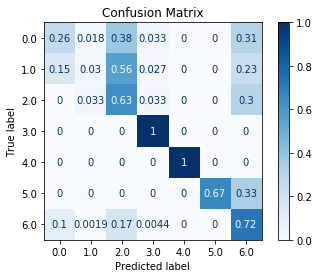

In [51]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Confusion Matrix")
# disp.confusion_matrix

# KNN
From a different file

# K means.
Noted that this is unsupervised and we need to provide number of classes which can be found from `len(set(MIC column))`

# SVM

In [11]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Prediction
score = accuracy_score(y_test, y_pred)
print(score)
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(score)

0.6931818181818182

# Decision tree

In [114]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.7395833333333334
Accuracy (2 dilutions): 0.8712121212121212


Text(0.5, 1.0, 'Confusion Matrix of Test dataset')

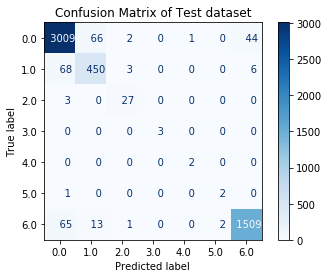

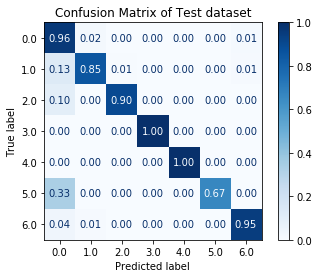

In [115]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix of Test dataset")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix of Test dataset")

In [89]:
set(y_test)

{'0.0', '1.0', '2.0', '5.0', '6.0'}

# k-Fold Validation

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)

# Random Forest

In [116]:
clf = ensemble.RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Prediction
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

# 2 dilutions Prediction
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(f"Accuracy (2 dilutions): {score}")

Accuracy: 0.8399621212121212
Accuracy (2 dilutions): 0.9299242424242424


Text(0.5, 1.0, 'Confusion Matrix of Test dataset')

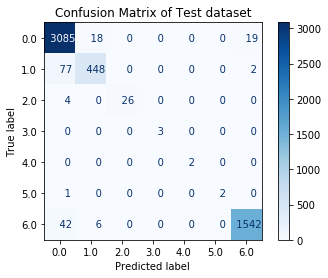

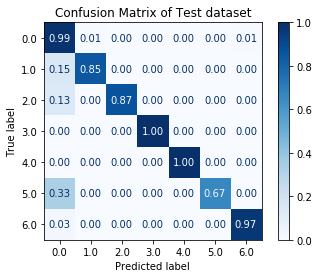

In [117]:
# Confusion matrix
disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize=None,
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='6')
disp.ax_.set_title("Confusion Matrix of Test dataset")
# disp.confusion_matrix

disp = plot_confusion_matrix(clf, X, y, cmap=plt.cm.Blues,normalize="true",
                            labels="0.0 1.0 2.0 3.0 4.0 5.0 6.0".split(),
                            values_format='.2f')
disp.ax_.set_title("Confusion Matrix of Test dataset")

# AdaBoost

In [15]:
clf = ensemble.AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Prediction
score = accuracy_score(y_test, y_pred)
print(score)
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(score)

0.6647727272727273
0.7443181818181819


# Gradient Boosting

In [30]:
clf = ensemble.GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Prediction
score = accuracy_score(y_test, y_pred)
print(score)
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(score)

KeyboardInterrupt: 

# Neural Network

In [29]:
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-7, 
                    hidden_layer_sizes=(100, 100, 100), 
                    random_state=1,
#                     learning_rate="adaptive",
                    max_iter=100000,
                    tol=1e-8
                   )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Prediction
score = accuracy_score(y_test, y_pred)
print(score)
score += accuracy_score(y_test_up, y_pred)
score += accuracy_score(y_test_down, y_pred)
print(score)

0.001893939393939394
0.33428030303030304
